In [36]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from keras import layers
from sklearn import preprocessing
from sklearn import model_selection
import sklearn

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
df = pd.read_csv("/content/drive/My Drive/datasets/cleaned_soccer_data_120K.csv")
df_test = df.query('fifa==16').reset_index(drop=True)

In [39]:
df 

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,...,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions,player_positions_general,fifa
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,169,67,93,95,3,4,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,...,14,8,1,0,0,0,1,0,1,0,89,89,89,92,90,90,90,92,92,92,92,90,79,79,79,90,62,62,62,62,62,54,45,45,45,54,0,CF,ATK,15
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,185,80,92,92,4,5,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,...,14,11,0,1,1,0,0,0,1,0,91,91,91,89,91,91,91,89,89,89,89,87,77,77,77,87,63,63,63,63,63,57,52,52,52,57,0,"LW, LM",ATK,15
2,9014,A. Robben,Arjen Robben,1984-01-23,180,80,90,90,2,4,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,...,5,15,1,0,1,0,0,0,1,0,84,84,84,88,87,87,87,88,88,88,88,87,78,78,78,87,64,64,64,64,64,55,46,46,46,55,0,"RM, LM, RW",MID,15
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,1981-10-03,195,95,90,90,4,4,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,...,9,12,0,1,0,0,1,0,1,0,87,87,87,84,86,86,86,84,86,86,86,83,76,76,76,83,61,65,65,65,61,56,55,55,55,56,0,ST,ATK,15
4,167495,M. Neuer,Manuel Neuer,1986-03-27,193,92,90,90,4,1,0.0,0.0,0.0,0.0,0.0,0.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,...,90,86,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,GK,GK,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121404,256679,K. Angulo,Kevin Angulo,1996-04-13,176,73,47,52,2,2,63.0,37.0,50.0,47.0,41.0,50.0,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,...,6,6,0,1,0,0,1,0,0,1,44,44,44,47,45,45,45,47,47,47,47,48,47,47,47,48,47,47,47,47,47,47,46,46,46,47,0,CM,MID,21
121405,257710,Zhang Mengxuan,Mengxuan Zhang,1999-04-26,177,70,47,52,2,2,58.0,23.0,26.0,27.0,50.0,48.0,23,16,45,31,26,19,21,22,25,24,60,56,45,48,70,35,65,55,45,23,44,50,25,25,...,14,6,0,1,0,1,0,0,1,0,32,32,32,30,30,30,30,30,29,29,29,31,32,32,32,31,42,41,41,41,42,45,47,47,47,45,0,CB,DEF,21
121406,250989,Wang Zhenghao,王政豪,2000-06-28,185,74,47,51,2,2,51.0,25.0,29.0,36.0,45.0,55.0,20,20,46,40,22,35,20,25,25,30,54,49,40,45,57,35,69,58,55,22,46,45,25,25,...,15,13,0,1,0,1,0,0,0,1,34,34,34,33,33,33,33,33,33,33,33,35,35,35,35,35,42,42,42,42,42,44,47,47,47,44,0,CB,DEF,21
121407,257697,Chen Zitong,Zitong Chen,1997-02-20,186,80,47,51,2,2,61.0,35.0,48.0,48.0,44.0,58.0,38,32,45,56,32,45,35,35,54,48,62,60,59,51,53,45,56,48,63,33,56,40,31,45,...,5,13,0,1,0,1,0,0,1,0,44,44,44,46,45,45,45,46,47,47,47,47,47,47,47,47,47,49,49,49,47,47,49,49,49,47,0,CM,MID,21


In [40]:
# drop useless columns and save them in a separate dataframe to be merged later

nominal_cols = ['sofifa_id','short_name','long_name','dob','fifa', 'player_positions_general']
df_nominal = df[nominal_cols]
df.drop(columns=nominal_cols,inplace=True)
df.head()

,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions
0,169,67,93,95,3,4,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,25.0,21,6,11,15,14,8,1,0,0,0,1,0,1,0,89,89,89,92,90,90,90,92,92,92,92,90,79,79,79,90,62,62,62,62,62,54,45,45,45,54,0,CF
1,185,80,92,92,4,5,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,22.0,31,7,11,15,14,11,0,1,1,0,0,0,1,0,91,91,91,89,91,91,91,89,89,89,89,87,77,77,77,87,63,63,63,63,63,57,52,52,52,57,0,"LW, LM"
2,180,80,90,90,2,4,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,29.0,26,10,8,11,5,15,1,0,1,0,0,0,1,0,84,84,84,88,87,87,87,88,88,88,88,87,78,78,78,87,64,64,64,64,64,55,46,46,46,55,0,"RM, LM, RW"
3,195,95,90,90,4,4,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,25.0,41,13,15,10,9,12,0,1,0,0,1,0,1,0,87,87,87,84,86,86,86,84,86,86,86,83,76,76,76,83,61,65,65,65,61,56,55,55,55,56,0,ST
4,193,92,90,90,4,1,0.0,0.0,0.0,0.0,0.0,0.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,37,25.0,25,87,85,92,90,86,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,GK


In [41]:
df_position = df['player_positions'].str.get_dummies(sep=', ')
df_position.head()


,CAM,CB,CDM,CF,CM,GK,LB,LM,LW,LWB,RB,RM,RW,RWB,ST
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [42]:
df.drop(columns=['player_positions'],inplace=True)

In [43]:
# check if all data is numerical

print(df.dtypes.values)

[dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('float64') dtype('float64')
 dtype('float64') dtype('float64') dtype('float64') dtype('float64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('float64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('int64') dtype('int64') dtype('int64') dtype('int64')
 dtype('in

In [44]:
# normalize data using MinMaxScaler

scaler = preprocessing.MinMaxScaler()

df_preprocessed = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_preprocessed

,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0.283019,0.295082,0.981481,1.000000,0.50,0.75,0.958763,0.956989,0.924731,1.000000,0.296703,0.684783,0.887640,0.989247,0.736264,0.931818,0.911111,0.989474,0.944444,0.945652,0.788889,1.000000,0.988372,0.918605,0.976471,0.973333,0.977011,0.829787,0.714286,0.770115,0.558140,0.934066,0.489362,0.211111,0.957447,0.934066,0.780220,0.265957,0.206522,0.055556,0.109890,0.148936,0.144444,0.075269,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.967391,0.967391,0.967391,0.989247,0.967742,0.967742,0.967742,0.989247,0.978723,0.978723,0.978723,0.978261,0.887640,0.887640,0.887640,0.978261,0.704545,0.712644,0.712644,0.712644,0.704545,0.627907,0.505618,0.505618,0.505618,0.627907,0.0
1,0.584906,0.508197,0.962963,0.945455,0.75,1.00,0.958763,1.000000,0.870968,0.947917,0.351648,0.858696,0.876404,1.000000,0.901099,0.852273,0.933333,0.957895,0.933333,0.826087,0.744444,0.956044,0.930233,0.965116,0.964706,0.920000,0.609195,0.978723,0.964286,0.908046,0.779070,0.989011,0.648936,0.233333,0.946809,0.835165,0.879121,0.234043,0.315217,0.066667,0.109890,0.148936,0.144444,0.107527,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.989130,0.989130,0.989130,0.956989,0.978495,0.978495,0.978495,0.956989,0.946809,0.946809,0.946809,0.945652,0.865169,0.865169,0.865169,0.945652,0.715909,0.724138,0.724138,0.724138,0.715909,0.662791,0.584270,0.584270,0.584270,0.662791,0.0
2,0.490566,0.508197,0.925926,0.909091,0.25,0.75,0.958763,0.924731,0.892473,0.958333,0.351648,0.695652,0.842697,0.892473,0.505495,0.897727,0.922222,0.957895,0.900000,0.869565,0.788889,0.934066,0.953488,0.953488,0.964706,0.906667,0.931034,0.893617,0.571429,0.781609,0.616279,0.956044,0.478723,0.400000,0.925532,0.868132,0.824176,0.308511,0.260870,0.100000,0.076923,0.106383,0.044444,0.150538,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.913043,0.913043,0.913043,0.946237,0.935484,0.935484,0.935484,0.946237,0.936170,0.936170,0.936170,0.945652,0.876404,0.876404,0.876404,0.945652,0.727273,0.735632,0.735632,0.735632,0.727273,0.639535,0.516854,0.516854,0.516854,0.639535,0.0
3,0.773585,0.754098,0.925926,0.909091,0.75,0.75,0.783505,0.978495,0.870968,0.895833,0.373626,0.934783,0.797753,0.956989,0.791209,0.875000,0.988889,0.905263,0.844444,0.836957,0.788889,0.934066,0.732558,0.767442,0.882353,0.853333,0.356322,0.968085,0.702381,0.781609,0.941860,0.934066,0.872340,0.188889,0.893617,0.857143,0.945055,0.265957,0.423913,0.133333,0.153846,0.095745,0.088889,0.118280,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.945652,0.945652,0.945652,0.903226,0.924731,0.924731,0.924731,0.903226,0.914894,0.914894,0.914894,0.902174,0.853933,0.853933,0.853933,0.902174,0.693182,0.747126,0.747126,0.747126,0.693182,0.651163,0.617978,0.617978,0.617978,0.651163,0.0
4,0.735849,0.704918,0.925926,0.909091,0.75,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.224719,0.247312,0.230769,0.397727,0.244444,0.242105,0.233333,0.239130,0.400000,0.285714,0.546512,0.581395,0.376471,0.906667,0.287356,0.425532,0.773810,0.390805,0.825581,0.241758,0.287234,0.300000,0.244681,0.164835,0.351648,0.265957,0.250000,0.955556,0.923077,0.968085,0.988889,0.913978,0.0

In [45]:
nominal_cols.append('player_positions')
df_nominal_test = df_test[nominal_cols]
df_test.drop(columns=nominal_cols,inplace=True)
df_preprocessed_test = pd.DataFrame(scaler.transform(df_test), columns=df_test.columns)

In [46]:
df_preprocessed_test

,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
0,0.301887,0.377049,1.000000,1.000000,0.75,0.75,0.948454,0.946237,0.924731,0.989583,0.263736,0.673913,0.842697,0.978495,0.736264,0.920455,0.911111,0.989474,0.944444,0.945652,0.822222,1.000000,0.976744,0.918605,0.952941,0.946667,0.977011,0.829787,0.654762,0.758621,0.546512,0.934066,0.489362,0.211111,0.936170,0.934066,0.758242,0.138298,0.228261,0.055556,0.109890,0.148936,0.144444,0.075269,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.945652,0.945652,0.945652,0.978495,0.978495,0.978495,0.978495,0.978495,0.968085,0.968085,0.968085,0.978261,0.921348,0.921348,0.921348,0.978261,0.704545,0.655172,0.655172,0.655172,0.704545,0.662791,0.494382,0.494382,0.494382,0.662791,0.0
1,0.584906,0.508197,0.981481,0.963636,0.75,1.00,0.948454,1.000000,0.860215,0.947917,0.362637,0.847826,0.865169,1.000000,0.901099,0.840909,0.933333,0.957895,0.933333,0.804348,0.744444,0.945055,0.930233,0.953488,0.929412,0.946667,0.597701,0.978723,0.964286,0.885057,0.779070,0.989011,0.638298,0.288889,0.968085,0.835165,0.879121,0.234043,0.315217,0.066667,0.109890,0.148936,0.144444,0.107527,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.989130,0.989130,0.989130,0.967742,0.978495,0.978495,0.978495,0.967742,0.936170,0.936170,0.936170,0.956522,0.898876,0.898876,0.898876,0.956522,0.727273,0.689655,0.689655,0.689655,0.727273,0.697674,0.584270,0.584270,0.584270,0.697674,0.0
2,0.490566,0.508197,0.925926,0.909091,0.25,0.75,0.948454,0.924731,0.881720,0.958333,0.351648,0.695652,0.842697,0.892473,0.516484,0.886364,0.922222,0.957895,0.911111,0.869565,0.766667,0.934066,0.941860,0.941860,0.941176,0.933333,0.931034,0.893617,0.571429,0.758621,0.616279,0.956044,0.478723,0.400000,0.925532,0.868132,0.824176,0.308511,0.260870,0.100000,0.076923,0.106383,0.044444,0.150538,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.913043,0.913043,0.913043,0.956989,0.946237,0.946237,0.946237,0.956989,0.936170,0.936170,0.936170,0.945652,0.898876,0.898876,0.898876,0.945652,0.738636,0.689655,0.689655,0.689655,0.738636,0.686047,0.528090,0.528090,0.528090,0.686047,0.0
3,0.735849,0.704918,0.925926,0.909091,0.75,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.112360,0.118280,0.230769,0.465909,0.088889,0.147368,0.111111,0.086957,0.466667,0.285714,0.546512,0.581395,0.376471,0.893333,0.287356,0.244681,0.773810,0.390805,0.825581,0.142857,0.287234,0.300000,0.106383,0.714286,0.351648,0.106383,0.086957,0.933333,0.945055,0.957447,0.988889,0.913978,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
4,0.528302,0.590164,0.925926,0.909091,0.75,0.75,0.855670,0.946237,0.849462,0.906250,0.461538,0.858696,0.808989,0.946237,0.802198,0.852273,0.933333,0.905263,0.911111,0.880435,0.655556,0.945055,0.895349,0.779070,0.882353,0.933333,0.574713,0.914894,0.666667,0.873563,0.744186,0.901099,0.808511,0.422222,0.946809,0.868132,0.879121,0.319149,0.467391,0.288889,0.263736,0.319149,0.355556,0.387097,0.0

In [47]:
# define feature and target columns

feature_cols = ['height_cm', 'weight_kg',
       'overall', 'potential', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'preferred_foot_Left', 'preferred_foot_Right', 'work_rate_0_High',
       'work_rate_0_Low', 'work_rate_0_Medium', 'work_rate_1_High',
       'work_rate_1_Low', 'work_rate_1_Medium'
            ]

In [48]:
# split train and test sets

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(df_preprocessed[feature_cols], df_position, test_size=0.2)

In [49]:
print(len(feature_cols))
print(len(df_position.columns))

52
15


In [50]:
from tensorflow import keras

In [51]:
# instantiate and fit model

input_dims = len(feature_cols)
output_dims = len(df_position.columns)

model = keras.Sequential(
    [
     layers.Dense(32, input_shape=(input_dims,), name='input_layer'),
     layers.Activation("relu"),
     layers.Dropout(0.2),
     layers.Dense(32, name='final_hidden_layer'),
     layers.Activation("relu"),
     layers.Dropout(0.2),
     layers.Dense(output_dims, activation='sigmoid'),
    ]
, name='positional_ratings_predictor')

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

model.summary()

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=32, callbacks=[keras.callbacks.EarlyStopping(monitor="val_loss", mode="min",patience=5)])

Model: "positional_ratings_predictor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                1696      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
final_hidden_layer (Dense)   (None, 32)                1056      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15

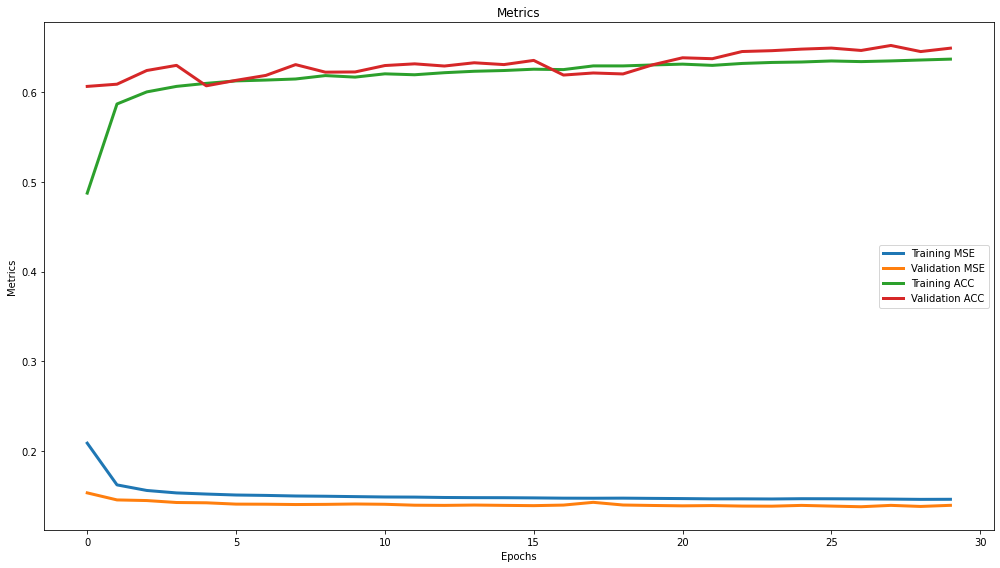

In [52]:
# plot loss graph

model_history = pd.DataFrame(history.history)
model_history['epoch'] = history.epoch

fig, ax = plt.subplots(figsize=(14,8))
num_epochs = model_history.shape[0]
ax.plot(np.arange(0, num_epochs), model_history["loss"], 
        label="Training MSE", lw=3)
ax.plot(np.arange(0, num_epochs), model_history["val_loss"], 
        label="Validation MSE", lw=3)
ax.plot(np.arange(0, num_epochs), model_history["acc"], 
        label="Training ACC", lw=3)
ax.plot(np.arange(0, num_epochs), model_history["val_acc"], 
        label="Validation ACC", lw=3)
plt.ylabel('Metrics')
plt.xlabel('Epochs')
plt.title("Metrics")
ax.legend()
plt.tight_layout()
plt.show()

In [53]:
model.summary()

Model: "positional_ratings_predictor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Dense)          (None, 32)                1696      
_________________________________________________________________
activation_2 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
final_hidden_layer (Dense)   (None, 32)                1056      
_________________________________________________________________
activation_3 (Activation)    (None, 32)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 15

In [54]:
# get output of last dense hidden layer with training flag set to 0

import keras.backend as K

outputs = [model.get_layer('final_hidden_layer').output]
functor = K.function([model.input], outputs)
layer_outs = functor([df_preprocessed_test[feature_cols].values, 0])
df_embeddings = pd.DataFrame(np.array(layer_outs).reshape(len(df_preprocessed_test[feature_cols]),32))
df_embeddings.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.384185,-0.817150,0.655758,-8.825802,-1.418382,-0.787258,0.535690,-0.110266,-0.185811,-0.734620,-0.696414,-9.106728,-17.465849,-6.387236,1.909532,-4.811422,-0.918236,-3.746819,-0.733108,3.959172,-7.094211,0.401743,0.002524,2.231605,-0.182885,0.152819,-0.036825,-1.953731,-13.264786,-0.438305,3.495309,-11.395788
1,1.963602,-0.412488,1.248543,-9.723330,-0.800455,-2.547191,0.358351,0.052267,-2.982596,-0.747147,0.296987,-8.759194,-16.049952,-4.884283,2.225321,-5.749493,-0.817617,-6.978041,0.194612,3.885798,-8.567838,1.194214,0.354861,2.656677,-1.825541,0.775984,0.139291,-4.533605,-13.219144,-0.491541,3.295766,-11.117963
2,0.682457,-0.918922,0.435628,-6.913095,-1.540726,0.072247,0.258495,-0.708202,0.561148,0.173357,-0.234868,-7.524434,-13.824486,-5.766955,1.554849,-3.659346,-0.569470,-1.698802,-0.274374,3.387418,-5.690644,0.180432,0.448971,1.603249,0.083752,-0.057630,0.575414,-0.735455,-9.205807,-0.265362,2.945627,-9.382098
3,8.759139,4.931218,-8.176373,-6.771255,9.874424,6.534393,-3.376425,9.486279,-20.313082,-7.560454,-11.277263,10.908841,5.399400,17.096823,-11.565335,-6.057902,-5.307082,-24.544718,-6.077254,-7.222008,-10.725275,-5.845004,-4.548346,12.755084,11.795378,-5.798935,-6.483835,-16.759857,-11.400349,14.527035,-7.247329,10.361020
4,1.222081,0.485414,0.512992,-7.329763,-0.217082,-0.964446,0.167903,0.437179,-1.018972,-0.526704,-0.102774,-6.395626,-11.577159,-3.402225,1.622735,-3.807481,-0.358383,-3.736414,-0.204703,2.907630,-5.664552,0.505085,0.133275,1.918600,-0.949254,0.147629,0.216129,-2.226554,-9.852603,-0.426773,2.332711,-8.162540


In [55]:
df_embeddings

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,1.384185,-0.817150,0.655758,-8.825802,-1.418382,-0.787258,0.535690,-0.110266,-0.185811,-0.734620,-0.696414,-9.106728,-17.465849,-6.387236,1.909532,-4.811422,-0.918236,-3.746819,-0.733108,3.959172,-7.094211,0.401743,0.002524,2.231605,-0.182885,0.152819,-0.036825,-1.953731,-13.264786,-0.438305,3.495309,-11.395788
1,1.963602,-0.412488,1.248543,-9.723330,-0.800455,-2.547191,0.358351,0.052267,-2.982596,-0.747147,0.296987,-8.759194,-16.049952,-4.884283,2.225321,-5.749493,-0.817617,-6.978041,0.194612,3.885798,-8.567838,1.194214,0.354861,2.656677,-1.825541,0.775984,0.139291,-4.533605,-13.219144,-0.491541,3.295766,-11.117963
2,0.682457,-0.918922,0.435628,-6.913095,-1.540726,0.072247,0.258495,-0.708202,0.561148,0.173357,-0.234868,-7.524434,-13.824486,-5.766955,1.554849,-3.659346,-0.569470,-1.698802,-0.274374,3.387418,-5.690644,0.180432,0.448971,1.603249,0.083752,-0.057630,0.575414,-0.735455,-9.205807,-0.265362,2.945627,-9.382098
3,8.759139,4.931218,-8.176373,-6.771255,9.874424,6.534393,-3.376425,9.486279,-20.313082,-7.560454,-11.277263,10.908841,5.399400,17.096823,-11.565335,-6.057902,-5.307082,-24.544718,-6.077254,-7.222008,-10.725275,-5.845004,-4.548346,12.755084,11.795378,-5.798935,-6.483835,-16.759857,-11.400349,14.527035,-7.247329,10.361020
4,1.222081,0.485414,0.512992,-7.329763,-0.217082,-0.964446,0.167903,0.437179,-1.018972,-0.526704,-0.102774,-6.395626,-11.577159,-3.402225,1.622735,-3.807481,-0.358383,-3.736414,-0.204703,2.907630,-5.664552,0.505085,0.133275,1.918600,-0.949254,0.147629,0.216129,-2.226554,-9.852603,-0.426773,2.332711,-8.162540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,0.133020,-0.220401,-0.357994,0.015659,0.382964,0.334781,0.438961,0.164719,0.435365,-0.533689,-0.432752,0.011965,-0.342163,-1.304946,0.429173,0.073238,-0.088739,0.407858,-0.293461,0.467856,0.298017,-0.005387,-0.424686,0.227777,0.253721,0.061514,-0.387427,0.490966,-1.206656,0.191221,0.136025,-0.042353
14877,0.290641,-0.497251,-0.498246,-0.076567,0.364980,0.429162,0.732421,0.429609,0.723235,-1.200301,-1.170457,-0.239595,-1.925383,-1.804822,0.472311,0.068953,-0.592074,0.313582,-0.675056,0.634931,-0.011832,-0.106683,-1.039586,0.370807,0.611469,0.074536,-0.958580,0.430522,-3.201175,0.224614,0.309877,-0.283821
14878,4.380184,3.465661,-5.074441,-3.695736,5.435754,5.400666,-2.058856,5.251523,-8.496968,-3.446417,-6.041813,5.729910,2.519173,8.821341,-5.582535,-2.488062,-1.947437,-9.870392,-3.654413,-3.441873,-4.375234,-4.100478,-2.156457,6.950335,7.546128,-3.732436,-2.654703,-6.224587,-5.394487,7.611784,-3.709761,5.384490
14879,-2.333545,0.514991,-0.126529,0.562264,-2.075544,0.939610,-0.227929,-0.218218,-0.293504,1.127407,0.260698,0.271566,0.607676,-1.838157,-0.255476,0.993066,-4.268638,0.620874,1.502907,-0.064923,-4.381593,0.065836,-0.135317,-0.457913,-0.475094,-0.257461,0.985177,-2.647640,0.527038,-0.020123,0.213827,1.458589


In [56]:
df_embeddings.columns = [f'PC{i}' for i in range(32)]
df_embeddings

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,1.384185,-0.817150,0.655758,-8.825802,-1.418382,-0.787258,0.535690,-0.110266,-0.185811,-0.734620,-0.696414,-9.106728,-17.465849,-6.387236,1.909532,-4.811422,-0.918236,-3.746819,-0.733108,3.959172,-7.094211,0.401743,0.002524,2.231605,-0.182885,0.152819,-0.036825,-1.953731,-13.264786,-0.438305,3.495309,-11.395788
1,1.963602,-0.412488,1.248543,-9.723330,-0.800455,-2.547191,0.358351,0.052267,-2.982596,-0.747147,0.296987,-8.759194,-16.049952,-4.884283,2.225321,-5.749493,-0.817617,-6.978041,0.194612,3.885798,-8.567838,1.194214,0.354861,2.656677,-1.825541,0.775984,0.139291,-4.533605,-13.219144,-0.491541,3.295766,-11.117963
2,0.682457,-0.918922,0.435628,-6.913095,-1.540726,0.072247,0.258495,-0.708202,0.561148,0.173357,-0.234868,-7.524434,-13.824486,-5.766955,1.554849,-3.659346,-0.569470,-1.698802,-0.274374,3.387418,-5.690644,0.180432,0.448971,1.603249,0.083752,-0.057630,0.575414,-0.735455,-9.205807,-0.265362,2.945627,-9.382098
3,8.759139,4.931218,-8.176373,-6.771255,9.874424,6.534393,-3.376425,9.486279,-20.313082,-7.560454,-11.277263,10.908841,5.399400,17.096823,-11.565335,-6.057902,-5.307082,-24.544718,-6.077254,-7.222008,-10.725275,-5.845004,-4.548346,12.755084,11.795378,-5.798935,-6.483835,-16.759857,-11.400349,14.527035,-7.247329,10.361020
4,1.222081,0.485414,0.512992,-7.329763,-0.217082,-0.964446,0.167903,0.437179,-1.018972,-0.526704,-0.102774,-6.395626,-11.577159,-3.402225,1.622735,-3.807481,-0.358383,-3.736414,-0.204703,2.907630,-5.664552,0.505085,0.133275,1.918600,-0.949254,0.147629,0.216129,-2.226554,-9.852603,-0.426773,2.332711,-8.162540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,0.133020,-0.220401,-0.357994,0.015659,0.382964,0.334781,0.438961,0.164719,0.435365,-0.533689,-0.432752,0.011965,-0.342163,-1.304946,0.429173,0.073238,-0.088739,0.407858,-0.293461,0.467856,0.298017,-0.005387,-0.424686,0.227777,0.253721,0.061514,-0.387427,0.490966,-1.206656,0.191221,0.136025,-0.042353
14877,0.290641,-0.497251,-0.498246,-0.076567,0.364980,0.429162,0.732421,0.429609,0.723235,-1.200301,-1.170457,-0.239595,-1.925383,-1.804822,0.472311,0.068953,-0.592074,0.313582,-0.675056,0.634931,-0.011832,-0.106683,-1.039586,0.370807,0.611469,0.074536,-0.958580,0.430522,-3.201175,0.224614,0.309877,-0.283821
14878,4.380184,3.465661,-5.074441,-3.695736,5.435754,5.400666,-2.058856,5.251523,-8.496968,-3.446417,-6.041813,5.729910,2.519173,8.821341,-5.582535,-2.488062,-1.947437,-9.870392,-3.654413,-3.441873,-4.375234,-4.100478,-2.156457,6.950335,7.546128,-3.732436,-2.654703,-6.224587,-5.394487,7.611784,-3.709761,5.384490
14879,-2.333545,0.514991,-0.126529,0.562264,-2.075544,0.939610,-0.227929,-0.218218,-0.293504,1.127407,0.260698,0.271566,0.607676,-1.838157,-0.255476,0.993066,-4.268638,0.620874,1.502907,-0.064923,-4.381593,0.065836,-0.135317,-0.457913,-0.475094,-0.257461,0.985177,-2.647640,0.527038,-0.020123,0.213827,1.458589


In [57]:
df_test_save = pd.concat([df_nominal_test, df_embeddings], axis=1)

In [58]:
df_test_save

,sofifa_id,short_name,long_name,dob,fifa,player_positions_general,player_positions,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,16,ATK,"RW, CF",1.384185,-0.817150,0.655758,-8.825802,-1.418382,-0.787258,0.535690,-0.110266,-0.185811,-0.734620,-0.696414,-9.106728,-17.465849,-6.387236,1.909532,-4.811422,-0.918236,-3.746819,-0.733108,3.959172,-7.094211,0.401743,0.002524,2.231605,-0.182885,0.152819,-0.036825,-1.953731,-13.264786,-0.438305,3.495309,-11.395788
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,16,ATK,"LW, LM",1.963602,-0.412488,1.248543,-9.723330,-0.800455,-2.547191,0.358351,0.052267,-2.982596,-0.747147,0.296987,-8.759194,-16.049952,-4.884283,2.225321,-5.749493,-0.817617,-6.978041,0.194612,3.885798,-8.567838,1.194214,0.354861,2.656677,-1.825541,0.775984,0.139291,-4.533605,-13.219144,-0.491541,3.295766,-11.117963
2,9014,A. Robben,Arjen Robben,1984-01-23,16,MID,"RM, LM, RW",0.682457,-0.918922,0.435628,-6.913095,-1.540726,0.072247,0.258495,-0.708202,0.561148,0.173357,-0.234868,-7.524434,-13.824486,-5.766955,1.554849,-3.659346,-0.569470,-1.698802,-0.274374,3.387418,-5.690644,0.180432,0.448971,1.603249,0.083752,-0.057630,0.575414,-0.735455,-9.205807,-0.265362,2.945627,-9.382098
3,167495,M. Neuer,Manuel Neuer,1986-03-27,16,GK,GK,8.759139,4.931218,-8.176373,-6.771255,9.874424,6.534393,-3.376425,9.486279,-20.313082,-7.560454,-11.277263,10.908841,5.399400,17.096823,-11.565335,-6.057902,-5.307082,-24.544718,-6.077254,-7.222008,-10.725275,-5.845004,-4.548346,12.755084,11.795378,-5.798935,-6.483835,-16.759857,-11.400349,14.527035,-7.247329,10.361020
4,176580,L. Suárez,Luis Alberto Suárez Díaz,1987-01-24,16,ATK,ST,1.222081,0.485414,0.512992,-7.329763,-0.217082,-0.964446,0.167903,0.437179,-1.018972,-0.526704,-0.102774,-6.395626,-11.577159,-3.402225,1.622735,-3.807481,-0.358383,-3.736414,-0.204703,2.907630,-5.664552,0.505085,0.133275,1.918600,-0.949254,0.147629,0.216129,-2.226554,-9.852603,-0.426773,2.332711,-8.162540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,224867,R. Horne,Ryan Horne,1995-11-02,16,MID,CM,0.133020,-0.220401,-0.357994,0.015659,0.382964,0.334781,0.438961,0.164719,0.435365,-0.533689,-0.432752,0.011965,-0.342163,-1.304946,0.429173,0.073238,-0.088739,0.407858,-0.293461,0.467856,0.298017,-0.005387,-0.424686,0.227777,0.253721,0.061514,-0.387427,0.490966,-1.206656,0.191221,0.136025,-0.042353
14877,229852,C. Shephard,Corey Shephard,1997-12-28,16,MID,CM,0.290641,-0.497251,-0.498246,-0.076567,0.364980,0.429162,0.732421,0.429609,0.723235,-1.200301,-1.170457,-0.239595,-1.925383,-1.804822,0.472311,0.068953,-0.592074,0.313582,-0.675056,0.634931,-0.011832,-0.106683,-1.039586,0.370807,0.611469,0.074536,-0.958580,0.430522,-3.201175,0.224614,0.309877,-0.283821
14878,227910,L. Gooch,Liam Gooch,1997-11-25,16,GK,GK,4.380184,3.465661,-5.074441,-3.695736,5.435754,5.400666,-2.058856,5.251523,-8.496968,-3.446417,-6.041813,5.729910,2.519173,8.821341,-5.582535,-2.488062,-1.947437,-9.870392,-3.654413,-3.441873,-4.375234,-4.100478,-2.156457,6.950335,7.546128,-3.732436,-2.654703,-6.224587,-5.394487,7.611784,-3.709761,5.384490
14879,225339,S. Warburton,Sam Warburton,1996-10-10,16,DEF,"LB, LM",-2.333545,0.514991,-0.126529,0.562264,-2.075544,0.939610,-0.227929,-0.218218,-0.293504,1.127407,0.260698,0.271566,0.607676,-1.838157,-0.255476,0.993066,-4.268638,0.620874,1.502907,-0.064923,-4.381593,0.065836,-0.135317,-0.457913,-0.475094,-0.257461,0.985177,-2.647640,0.527038,-0.020123,0.213827,1.458589


In [59]:
df_test_save.to_csv('dnn_embeddings_v3.csv', index=False)

In [60]:
# join embeddings df back onto nominal df

df_final = pd.concat([df_embeddings, df_nominal], axis=1)
df_final

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,sofifa_id,short_name,long_name,dob,fifa,player_positions_general
0,1.384185,-0.817150,0.655758,-8.825802,-1.418382,-0.787258,0.535690,-0.110266,-0.185811,-0.734620,-0.696414,-9.106728,-17.465849,-6.387236,1.909532,-4.811422,-0.918236,-3.746819,-0.733108,3.959172,-7.094211,0.401743,0.002524,2.231605,-0.182885,0.152819,-0.036825,-1.953731,-13.264786,-0.438305,3.495309,-11.395788,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,15,ATK
1,1.963602,-0.412488,1.248543,-9.723330,-0.800455,-2.547191,0.358351,0.052267,-2.982596,-0.747147,0.296987,-8.759194,-16.049952,-4.884283,2.225321,-5.749493,-0.817617,-6.978041,0.194612,3.885798,-8.567838,1.194214,0.354861,2.656677,-1.825541,0.775984,0.139291,-4.533605,-13.219144,-0.491541,3.295766,-11.117963,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,15,ATK
2,0.682457,-0.918922,0.435628,-6.913095,-1.540726,0.072247,0.258495,-0.708202,0.561148,0.173357,-0.234868,-7.524434,-13.824486,-5.766955,1.554849,-3.659346,-0.569470,-1.698802,-0.274374,3.387418,-5.690644,0.180432,0.448971,1.603249,0.083752,-0.057630,0.575414,-0.735455,-9.205807,-0.265362,2.945627,-9.382098,9014,A. Robben,Arjen Robben,1984-01-23,15,MID
3,8.759139,4.931218,-8.176373,-6.771255,9.874424,6.534393,-3.376425,9.486279,-20.313082,-7.560454,-11.277263,10.908841,5.399400,17.096823,-11.565335,-6.057902,-5.307082,-24.544718,-6.077254,-7.222008,-10.725275,-5.845004,-4.548346,12.755084,11.795378,-5.798935,-6.483835,-16.759857,-11.400349,14.527035,-7.247329,10.361020,41236,Z. Ibrahimović,Zlatan Ibrahimović,1981-10-03,15,ATK
4,1.222081,0.485414,0.512992,-7.329763,-0.217082,-0.964446,0.167903,0.437179,-1.018972,-0.526704,-0.102774,-6.395626,-11.577159,-3.402225,1.622735,-3.807481,-0.358383,-3.736414,-0.204703,2.907630,-5.664552,0.505085,0.133275,1.918600,-0.949254,0.147629,0.216129,-2.226554,-9.852603,-0.426773,2.332711,-8.162540,167495,M. Neuer,Manuel Neuer,1986-03-27,15,GK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121404,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,256679,K. Angulo,Kevin Angulo,1996-04-13,21,MID
121405,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257710,Zhang Mengxuan,Mengxuan Zhang,1999-04-26,21,DEF
121406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,250989,Wang Zhenghao,王政豪,2000-06-28,21,DEF
121407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,257697,Chen Zitong,Zitong Chen,1997-02-20,21,MID


In [61]:
from sklearn.preprocessing import OrdinalEncoder

df_subset = pd.concat([df_embeddings, df_nominal_test[['player_positions_general', 'fifa']]], axis=1)
encoder = OrdinalEncoder()
df_subset['label'] = encoder.fit_transform(np.array(df_nominal_test['player_positions_general']).reshape(-1,1))
print(df_subset[['player_positions_general','label']])

      player_positions_general  label
0                          ATK    0.0
1                          ATK    0.0
2                          MID    3.0
3                           GK    2.0
4                          ATK    0.0
...                        ...    ...
14876                      MID    3.0
14877                      MID    3.0
14878                       GK    2.0
14879                      DEF    1.0
14880                       GK    2.0

[14881 rows x 2 columns]


In [62]:
df_subset

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,player_positions_general,fifa,label
0,1.384185,-0.817150,0.655758,-8.825802,-1.418382,-0.787258,0.535690,-0.110266,-0.185811,-0.734620,-0.696414,-9.106728,-17.465849,-6.387236,1.909532,-4.811422,-0.918236,-3.746819,-0.733108,3.959172,-7.094211,0.401743,0.002524,2.231605,-0.182885,0.152819,-0.036825,-1.953731,-13.264786,-0.438305,3.495309,-11.395788,ATK,16,0.0
1,1.963602,-0.412488,1.248543,-9.723330,-0.800455,-2.547191,0.358351,0.052267,-2.982596,-0.747147,0.296987,-8.759194,-16.049952,-4.884283,2.225321,-5.749493,-0.817617,-6.978041,0.194612,3.885798,-8.567838,1.194214,0.354861,2.656677,-1.825541,0.775984,0.139291,-4.533605,-13.219144,-0.491541,3.295766,-11.117963,ATK,16,0.0
2,0.682457,-0.918922,0.435628,-6.913095,-1.540726,0.072247,0.258495,-0.708202,0.561148,0.173357,-0.234868,-7.524434,-13.824486,-5.766955,1.554849,-3.659346,-0.569470,-1.698802,-0.274374,3.387418,-5.690644,0.180432,0.448971,1.603249,0.083752,-0.057630,0.575414,-0.735455,-9.205807,-0.265362,2.945627,-9.382098,MID,16,3.0
3,8.759139,4.931218,-8.176373,-6.771255,9.874424,6.534393,-3.376425,9.486279,-20.313082,-7.560454,-11.277263,10.908841,5.399400,17.096823,-11.565335,-6.057902,-5.307082,-24.544718,-6.077254,-7.222008,-10.725275,-5.845004,-4.548346,12.755084,11.795378,-5.798935,-6.483835,-16.759857,-11.400349,14.527035,-7.247329,10.361020,GK,16,2.0
4,1.222081,0.485414,0.512992,-7.329763,-0.217082,-0.964446,0.167903,0.437179,-1.018972,-0.526704,-0.102774,-6.395626,-11.577159,-3.402225,1.622735,-3.807481,-0.358383,-3.736414,-0.204703,2.907630,-5.664552,0.505085,0.133275,1.918600,-0.949254,0.147629,0.216129,-2.226554,-9.852603,-0.426773,2.332711,-8.162540,ATK,16,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,0.133020,-0.220401,-0.357994,0.015659,0.382964,0.334781,0.438961,0.164719,0.435365,-0.533689,-0.432752,0.011965,-0.342163,-1.304946,0.429173,0.073238,-0.088739,0.407858,-0.293461,0.467856,0.298017,-0.005387,-0.424686,0.227777,0.253721,0.061514,-0.387427,0.490966,-1.206656,0.191221,0.136025,-0.042353,MID,16,3.0
14877,0.290641,-0.497251,-0.498246,-0.076567,0.364980,0.429162,0.732421,0.429609,0.723235,-1.200301,-1.170457,-0.239595,-1.925383,-1.804822,0.472311,0.068953,-0.592074,0.313582,-0.675056,0.634931,-0.011832,-0.106683,-1.039586,0.370807,0.611469,0.074536,-0.958580,0.430522,-3.201175,0.224614,0.309877,-0.283821,MID,16,3.0
14878,4.380184,3.465661,-5.074441,-3.695736,5.435754,5.400666,-2.058856,5.251523,-8.496968,-3.446417,-6.041813,5.729910,2.519173,8.821341,-5.582535,-2.488062,-1.947437,-9.870392,-3.654413,-3.441873,-4.375234,-4.100478,-2.156457,6.950335,7.546128,-3.732436,-2.654703,-6.224587,-5.394487,7.611784,-3.709761,5.384490,GK,16,2.0
14879,-2.333545,0.514991,-0.126529,0.562264,-2.075544,0.939610,-0.227929,-0.218218,-0.293504,1.127407,0.260698,0.271566,0.607676,-1.838157,-0.255476,0.993066,-4.268638,0.620874,1.502907,-0.064923,-4.381593,0.065836,-0.135317,-0.457913,-0.475094,-0.257461,0.985177,-2.647640,0.527038,-0.020123,0.213827,1.458589,DEF,16,1.0


In [63]:
# visualizing the embeddings

import seaborn as sns
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=25, n_iter=350)
tsne_results = tsne.fit_transform(df_subset.drop(columns=['label','fifa','player_positions_general']))

[t-SNE] Computing 76 nearest neighbors...
[t-SNE] Indexed 14881 samples in 0.061s...
[t-SNE] Computed neighbors for 14881 samples in 1.649s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14881
[t-SNE] Computed conditional probabilities for sample 2000 / 14881
[t-SNE] Computed conditional probabilities for sample 3000 / 14881
[t-SNE] Computed conditional probabilities for sample 4000 / 14881
[t-SNE] Computed conditional probabilities for sample 5000 / 14881
[t-SNE] Computed conditional probabilities for sample 6000 / 14881
[t-SNE] Computed conditional probabilities for sample 7000 / 14881
[t-SNE] Computed conditional probabilities for sample 8000 / 14881
[t-SNE] Computed conditional probabilities for sample 9000 / 14881
[t-SNE] Computed conditional probabilities for sample 10000 / 14881
[t-SNE] Computed conditional probabilities for sample 11000 / 14881
[t-SNE] Computed conditional probabilities for sample 12000 / 14881
[t-SNE] Computed conditional probabilities for sam

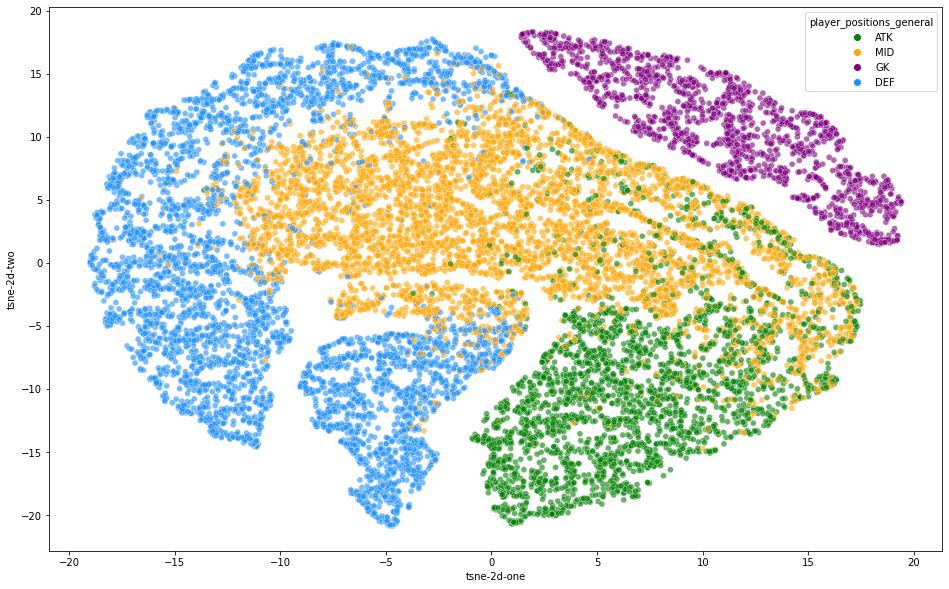

In [64]:
# plot tsne results on scatterplot, where ATK = 0, DEF = 1, GK = 2, MID = 3

color_dict = dict({'ATK':'green',
                  'MID':'orange',
                  'DEF': 'dodgerblue',
                  'GK': 'purple',
                 })

df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="player_positions_general",
    palette=color_dict,
    data=df_subset,
    legend="full",
    alpha=0.6
)